In [1]:
import numpy as np
import matplotlib.pyplot as plt
import itertools

# A

In [2]:
def is_in_hipersphere(point,radius,center_point):
    return np.square(point - center_point).sum() <= np.square(radius)

In [3]:
def generate_random_point(min_val,max_val,dim):
    np.random.rand(dim)
    return np.random.rand(dim)*(max_val-min_val) - abs(min_val)

In [4]:
X = 1
def space(dim,density): 
    return np.array([generate_random_point(-X,X,dim) for _ in np.arange(density)])

In [5]:
density= 10000
dims = np.arange(1,20)
aggr_counts=[]
counts = []

for _ in range(10):
    for dim in dims:
        spc = space(dim,density)
        mask = np.array([is_in_hipersphere(point,X,np.zeros(dim)) for point in spc])
        counts += [len(spc[mask])/density*100]
    aggr_counts += [np.array(counts)]
    counts = []

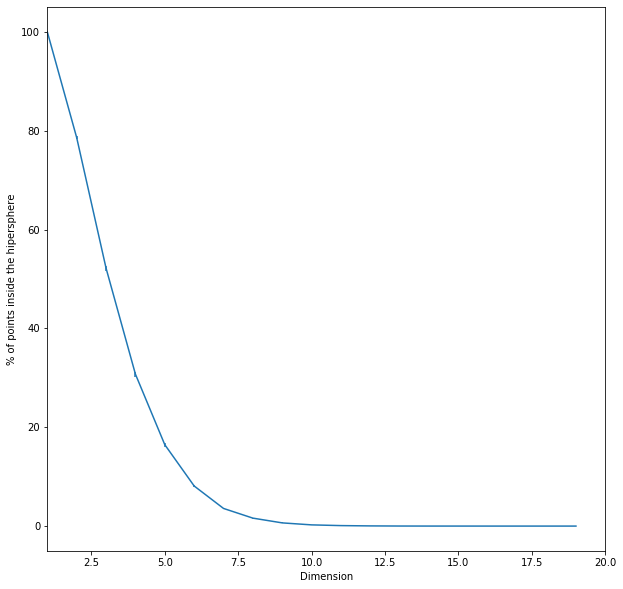

In [6]:
mean_counts = np.mean(aggr_counts,axis=0)
deviation= np.std(aggr_counts,axis=0)
fig,ax = plt.subplots(figsize=(10,10))
ax.errorbar(dims,mean_counts,yerr=deviation)
plt.xlim(1,20)  
ax.set_xlabel('Dimension')
ax.set_ylabel('% of points inside the hipersphere')
plt.show()

Można zauważyć że wraz ze wzrostem wymiaru przestrzeni spada objętość hiperkuli względem objętości sześcianu, co jest zjawiskiem oczekiwanym

# B

In [7]:
def space(density,dim):
    return np.array([generate_random_point(0,1,dim) for _ in np.arange(density)])

In [8]:
dims = np.arange(2,20,2)
coeff = []
for dim in dims:
    tmp_coeff = []
    for _ in range(10):
        spc = space(1000,dim)
        combs = np.array(list(itertools.combinations(spc,2)))
        distances = np.sqrt(np.sum(np.sum(np.square(combs),axis=2),axis=1))
        tmp_coeff += [np.std(distances)/np.mean(distances)]
    coeff += [np.mean(tmp_coeff)]
    tmp_coeff = []

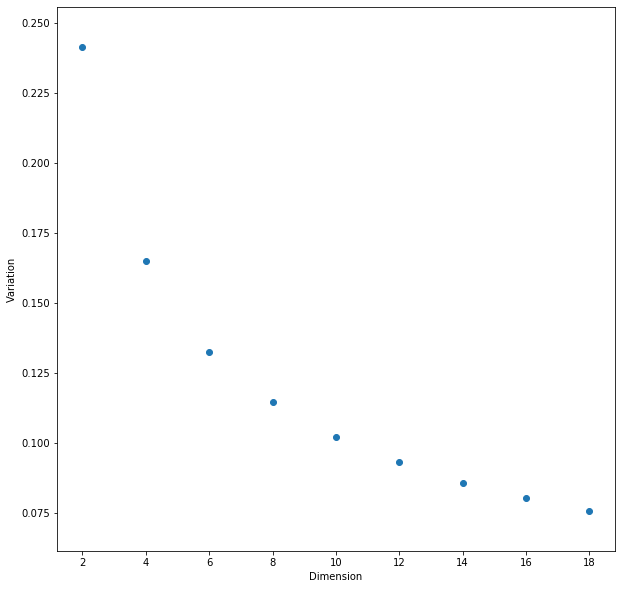

In [9]:
fig,ax = plt.subplots(figsize=(10,10))
ax.scatter(np.arange(2,20,2),coeff)
ax.set_xlabel('Dimension')
ax.set_ylabel('Variation')
plt.show()

Widzimy że spada wariancja odległości dwóch losowo wybranych punktów, wynika to z tego że odległość punktów zależy od położenia a to zależy od losowy wybranych punktów.
Zatem zwiększając poziom wymiaru, upodabniamy punkty względem odległości => odległość jest słabą metryką różnicującą w przestrzeni hiperwymiarowej.

# C

In [10]:
def unit_vector(vector):
    return vector / np.linalg.norm(vector)

def angle_between(v1, v2):
    v1_u = unit_vector(v1)
    v2_u = unit_vector(v2)
    return np.arccos(np.clip(np.dot(v1_u, v2_u), -1.0, 1.0))

In [11]:
def show_histogram(spc):
    size = spc.shape[0]
    shuffled = np.random.permutation(spc)
    shuffled_pairs = [angle_between(*i) for i in zip(shuffled[:size-1],shuffled[1:size])]
    fig,ax = plt.subplots(figsize=(10,10))
    ax.hist(shuffled_pairs)
    ax.set_xlabel('Degree')
    ax.set_ylabel('Number of occurences')
    plt.xlim(-.5, 3.15)  
    print(f'Current dim {dim}')
    plt.show()

Current dim 2


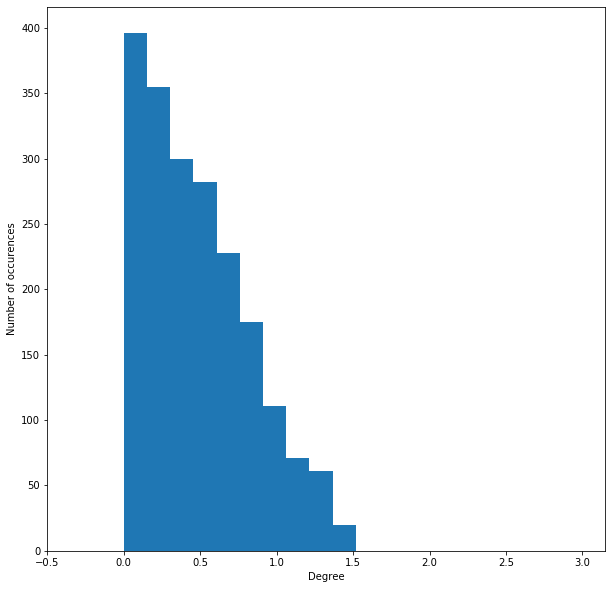

Current dim 12


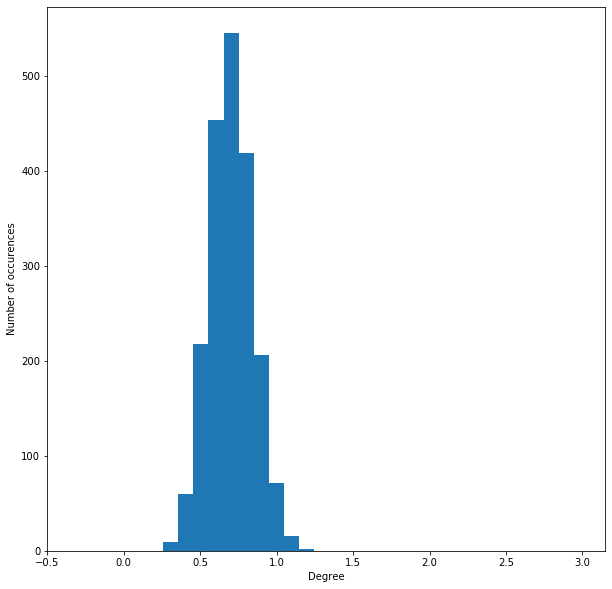

Current dim 22


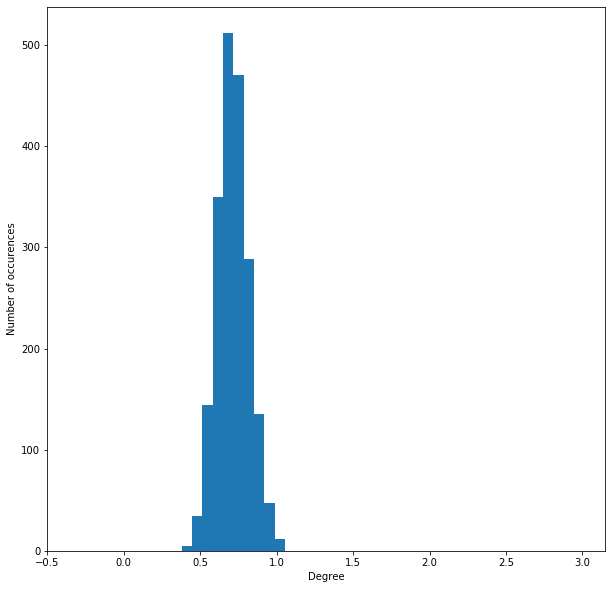

Current dim 32


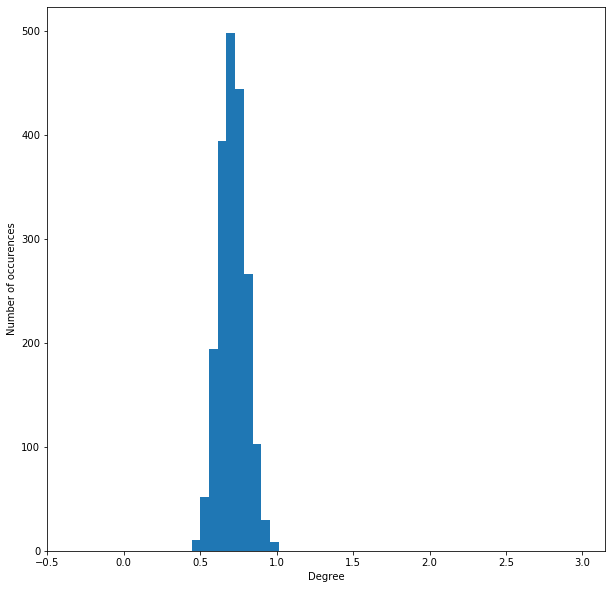

Current dim 42


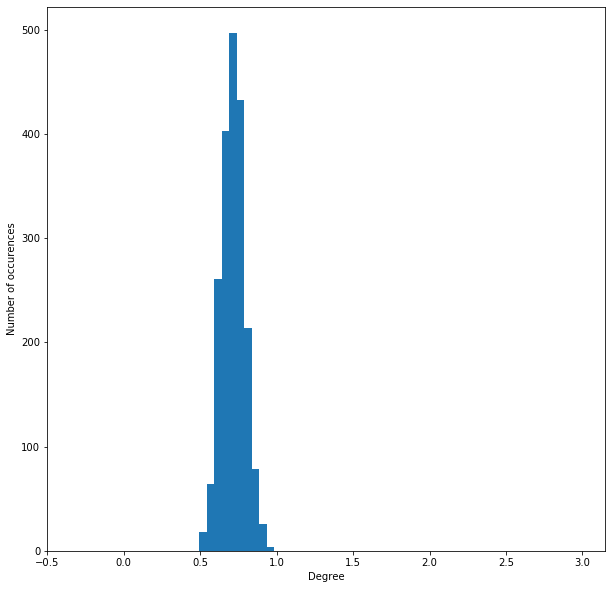

Current dim 52


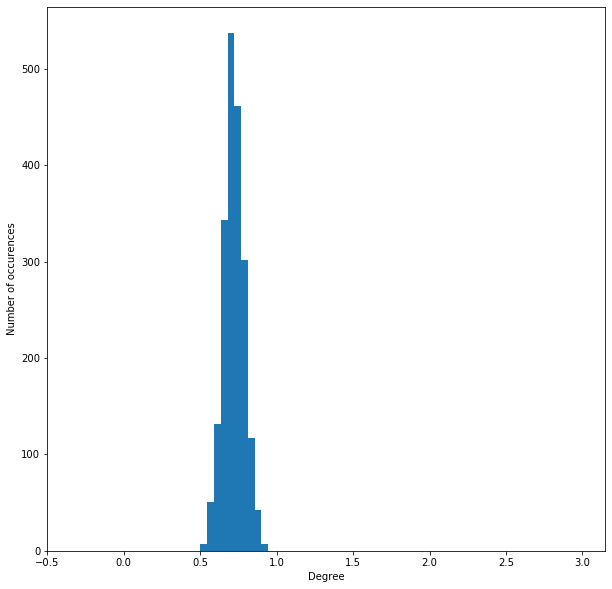

Current dim 62


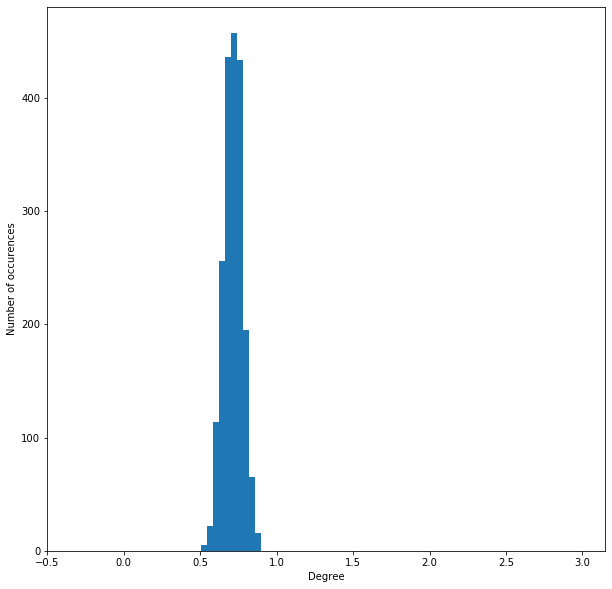

Current dim 72


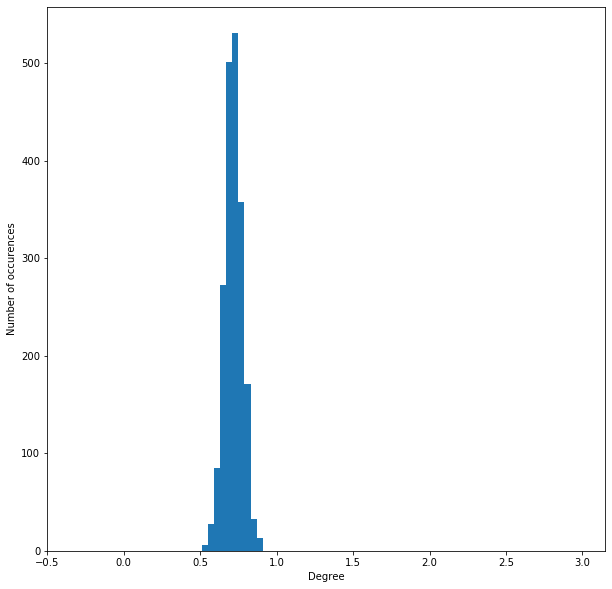

Current dim 82


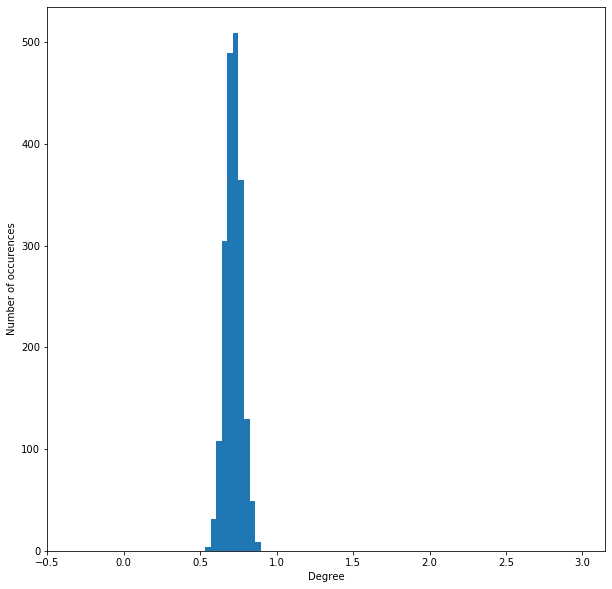

Current dim 92


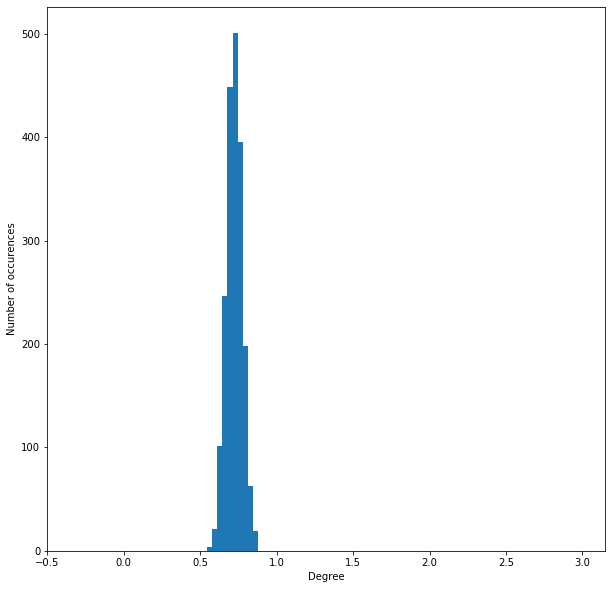

In [12]:
for dim in range(2,100,10):
    spc = space(2*1000,dim)
    show_histogram(spc)

Widzimy że miara kąta losowo stworzonego wektora dąży do ok 40 stopni co pokazuje że miara tego kąta również nie będzie dobrym rozróżnikiem przy identyfikacji wektorów w przestrzeniach wielo wymiarowych.